<a href="https://colab.research.google.com/github/hejasevis/Credit-Approval-Dataset-Analysis/blob/main/Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# Install required library
!pip install ucimlrepo scikit-learn pandas numpy

In [12]:
# Import necessary libraries
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd
import numpy as np

In [13]:
# Get Dataset
credit_approval = fetch_ucirepo(id=27)

# Get the data
X = credit_approval.data.features
y = credit_approval.data.targets

# Converting categorical data to numbers
categorical_columns = X.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])  # Convert categorical features to numbers
    label_encoders[col] = le  # Save the encoder

# If target variable 'y' is categorical, convert it to number using LabelEncoder
if isinstance(y, pd.DataFrame):
    y = y.squeeze()  # Convert DataFrame to Series

if y.dtype == 'object' or isinstance(y.iloc[0], str):
    encoder = LabelEncoder()
    y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Let's scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
from sklearn.impute import SimpleImputer

# Fill missing values ​​with average
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 1. Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))


Logistic Regression
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        97
           1       0.87      0.80      0.83       110

    accuracy                           0.83       207
   macro avg       0.83      0.83      0.83       207
weighted avg       0.83      0.83      0.83       207

Accuracy: 0.8309178743961353


In [15]:
# 2. Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("\nDecision Tree")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        97
           1       0.80      0.89      0.84       110

    accuracy                           0.83       207
   macro avg       0.83      0.82      0.82       207
weighted avg       0.83      0.83      0.82       207

Accuracy: 0.8260869565217391


In [16]:
# 3. RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("\nRandom Forest")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        97
           1       0.88      0.88      0.88       110

    accuracy                           0.87       207
   macro avg       0.87      0.87      0.87       207
weighted avg       0.87      0.87      0.87       207

Accuracy: 0.8743961352657005


In [17]:
# 4. SVM
svm = SVC(random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))


Support Vector Machine
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        97
           1       0.88      0.81      0.84       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy: 0.8405797101449275


In [18]:
# 5. Gradient Boosting Machines (GBM)
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)
y_pred_gbm = gbm.predict(X_test)
print("\nGradient Boosting Machines (GBM)")
print(classification_report(y_test, y_pred_gbm))
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))


Gradient Boosting Machines (GBM)
              precision    recall  f1-score   support

           0       0.83      0.86      0.84        97
           1       0.87      0.85      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy: 0.8502415458937198


In [19]:
# Neural Network
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(random_state=42)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
print("\nNeural Network")
print(classification_report(y_test, y_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_pred_nn))


Neural Network
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        97
           1       0.88      0.84      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy: 0.8502415458937198


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


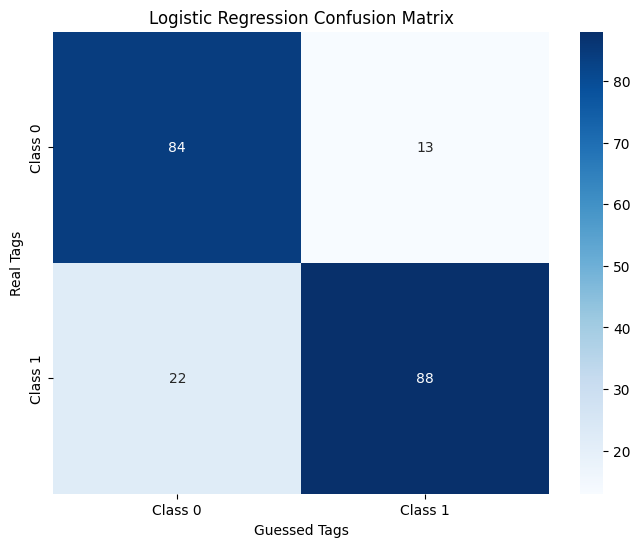

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)

# Let's visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Guessed Tags")
plt.ylabel("Real Tags")
plt.show()

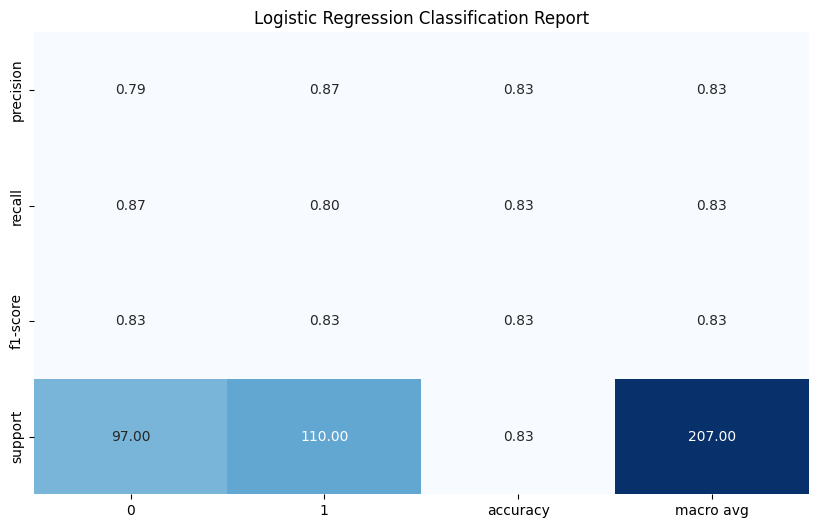

In [21]:
from sklearn.metrics import classification_report
import pandas as pd

# Let's get the classification report
report = classification_report(y_test, y_pred_lr, output_dict=True)

# Convert the report to DataFrame and visualize it
report_df = pd.DataFrame(report).transpose()

# Visualize the classification report
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :].T, annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title("Logistic Regression Classification Report")
plt.show()


<ipython-input-22-8c8dfbff0a4b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


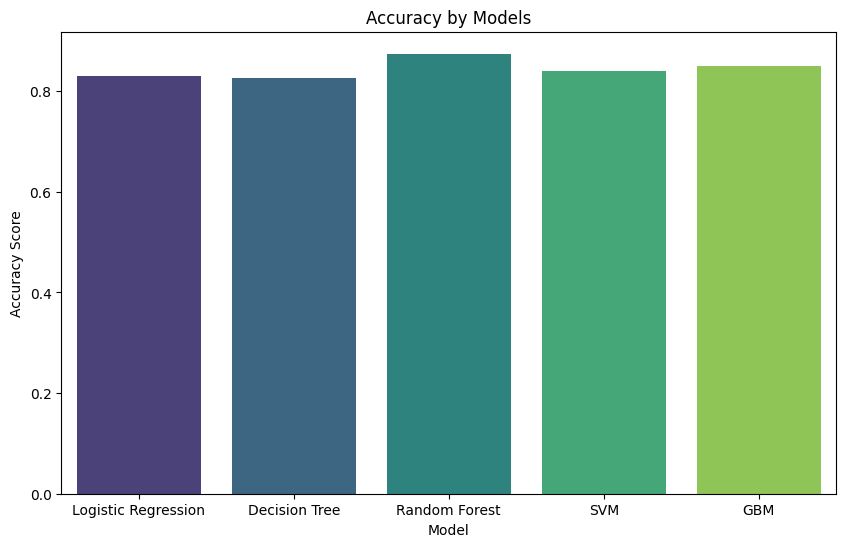

In [22]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'GBM']
accuracies = [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_gbm)]

# Accuracy Graph
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title("Accuracy by Models")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.show()


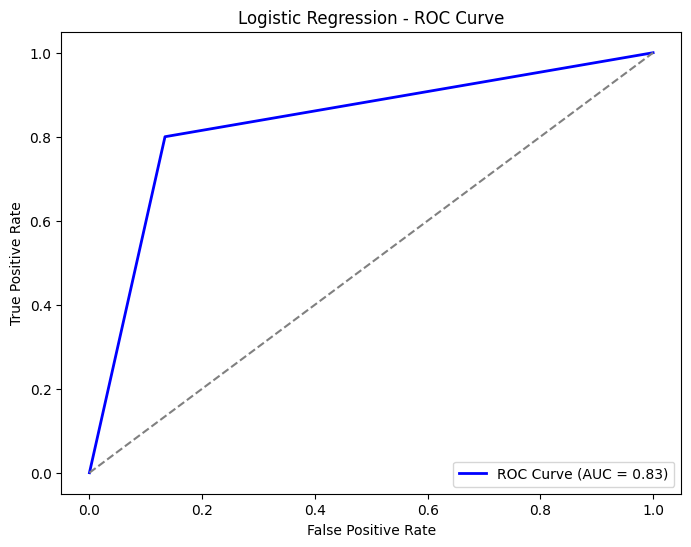

In [23]:
from sklearn.metrics import roc_curve, auc

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc = auc(fpr, tpr)

# Draw the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


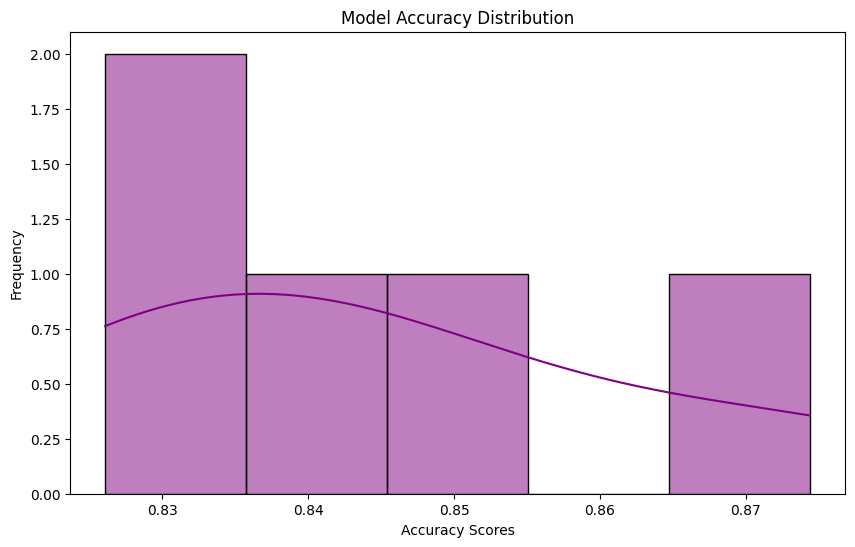

In [24]:
import numpy as np

# Visualize the distribution of Accuracy Scores
accuracies = np.array([accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_dt), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_gbm)])

plt.figure(figsize=(10, 6))
sns.histplot(accuracies, kde=True, color='purple', bins=5)
plt.title("Model Accuracy Distribution")
plt.xlabel("Accuracy Scores")
plt.ylabel("Frequency")
plt.show()


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Calculate the metrics
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'GBM'],
    'Accuracy': [accuracy_score(y_test, y_pred_lr),
                 accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_svm),
                 accuracy_score(y_test, y_pred_gbm)],
    'Precision': [precision_score(y_test, y_pred_lr),
                  precision_score(y_test, y_pred_dt),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_svm),
                  precision_score(y_test, y_pred_gbm)],
    'Recall': [recall_score(y_test, y_pred_lr),
               recall_score(y_test, y_pred_dt),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_svm),
               recall_score(y_test, y_pred_gbm)],
    'F1 Score': [f1_score(y_test, y_pred_lr),
                 f1_score(y_test, y_pred_dt),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_svm),
                 f1_score(y_test, y_pred_gbm)]
}

# Convert it to DataFrame and make it more accessible
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

metrics_df


,Accuracy,Precision,Recall,F1 Score
Model,,,,
Logistic Regression,0.830918,0.871287,0.800000,0.834123
Decision Tree,0.826087,0.803279,0.890909,0.844828
Random Forest,0.874396,0.881818,0.881818,0.881818
SVM,0.840580,0.881188,0.809091,0.843602
GBM,0.850242,0.869159,0.845455,0.857143


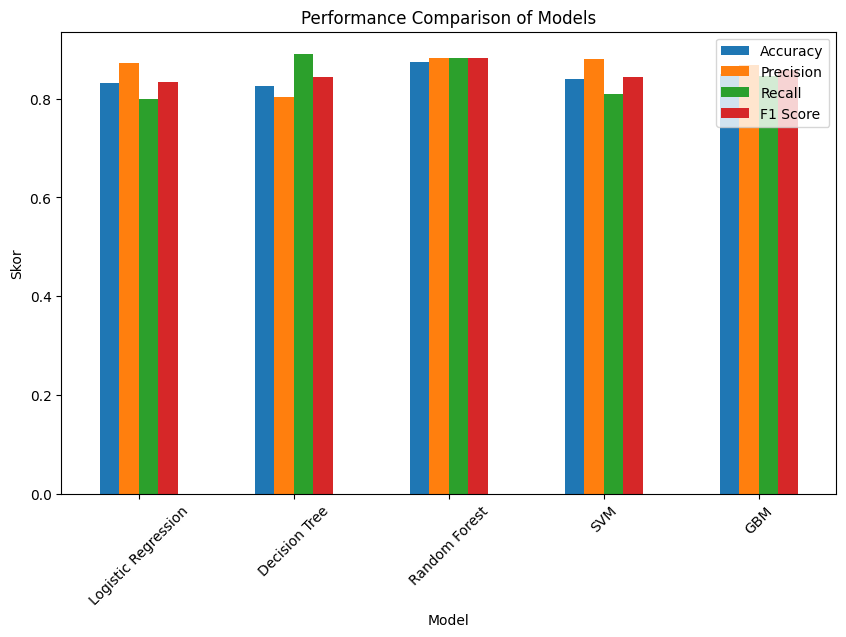

In [26]:
# Performance metrics will be visualized
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Performance Comparison of Models")
plt.ylabel("Skor")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

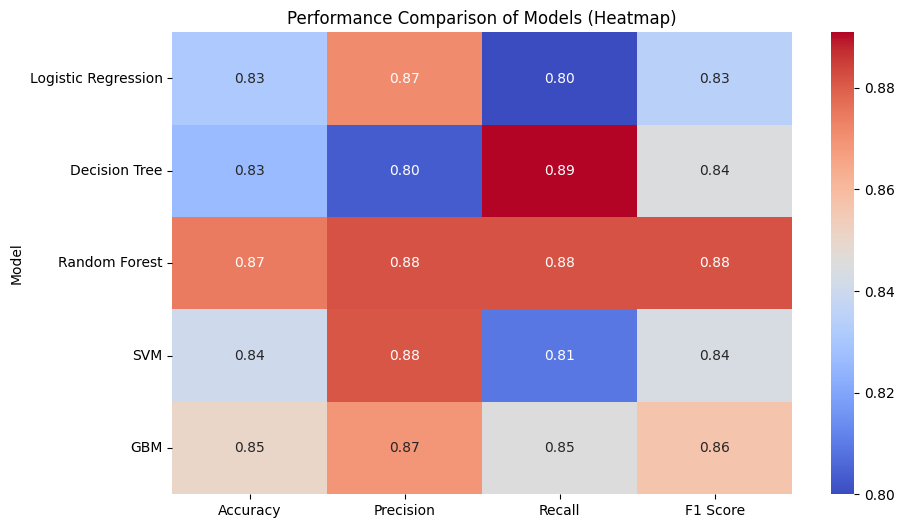

In [27]:
import seaborn as sns

# Visualize metrics with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Performance Comparison of Models (Heatmap)")
plt.show()
